Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
Answer:
Difference between K-Means and Hierarchical Clustering
Clustering is an unsupervised learning technique used to group similar data points together. Both K-Means and Hierarchical Clustering are widely used clustering algorithms, but they differ in methodology, working, and application.

1. Approach
K-Means Clustering:

It is a partition-based method.
It divides the dataset into K fixed number of clusters.
The algorithm iteratively minimizes the distance between data points and the cluster centroid.
Hierarchical Clustering:

It is a tree-based method.
It builds clusters in a hierarchical structure using either agglomerative (bottom-up) or divisive (top-down) approaches.
The result is shown in a dendrogram, which helps visualize merging or splitting of clusters.
2. Number of Clusters
K-Means: Requires the user to specify the number of clusters (K) in advance.
Hierarchical: Does not require the number of clusters beforehand. The dendrogram helps in deciding the cut to form clusters.
3. Scalability
K-Means: Very efficient for large datasets (can handle millions of rows).
Hierarchical: Computationally expensive and not suitable for very large datasets.
4. Output
K-Means: Produces a fixed set of clusters with centroids.
Hierarchical: Produces a tree-like structure (dendrogram), offering more flexibility in choosing clusters.
Tabular Difference for Better Clarity
Feature	K-Means Clustering	Hierarchical Clustering
Approach	Partition-based	Tree-based (Agglomerative/Divisive)
Need for K (clusters)	Must be specified in advance	Not required initially
Scalability	Works well with large datasets	Slow with large datasets
Result representation	Cluster centroids	Dendrogram (tree)
Flexibility	Fixed clusters	Flexible, user can cut dendrogram at any level
Use Cases
K-Means Use Case:

Customer segmentation in marketing (e.g., grouping customers into clusters based on purchasing habits).
Example: An e-commerce company divides customers into 4 clusters — frequent buyers, occasional buyers, discount seekers, and premium buyers.
Hierarchical Clustering Use Case:

Document or gene similarity analysis (where relationships between clusters matter).
Example: In biology, hierarchical clustering is used to group species based on genetic similarities, showing evolutionary relationships through a dendrogram.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
Answer:
What is the Silhouette Score?
The Silhouette Score is a metric used to evaluate how well data points are clustered in a clustering algorithm. It measures both:

How close a data point is to its own cluster (cohesion).
How far away it is from points in other clusters (separation).
It gives an overall idea of the quality of clustering without requiring ground truth labels (unsupervised evaluation).

Formula for Silhouette Score
For each data point (i):

a(i): Average distance of (i) to all other points in the same cluster. (Measures cohesion)
b(i): Minimum average distance of (i) to all points in other clusters. (Measures separation)
The silhouette score for point (i) is:

s(i) = ( b(i) - a(i) ) / max(a(i), b(i))

The overall silhouette score is the average of all s(i).

Range of Silhouette Score
+1 (close to 1): Data point is well matched to its own cluster and far from other clusters. (Good clustering)
0: Data point lies on the boundary between two clusters.
-1 (close to -1): Data point may be in the wrong cluster (poor clustering).
Why is it Important?
Helps evaluate the goodness of clustering when the true labels are not known.
Works for different clustering algorithms (K-Means, Hierarchical, DBSCAN, etc.).
Can be used to choose the optimal number of clusters (K) by comparing silhouette scores for different K values.
Example for Better Understanding
Suppose you run K-Means with K=2 and K=4.
For K=2, the silhouette score = 0.82 (high → clusters are well separated).
For K=4, the silhouette score = 0.41 (lower → clusters are overlapping).
In this case, K=2 would be considered the better clustering choice.

Key Points to Remember
Silhouette score is an unsupervised evaluation metric.
Higher values (closer to 1) indicate better clustering.
It considers both intra-cluster similarity and inter-cluster separation.

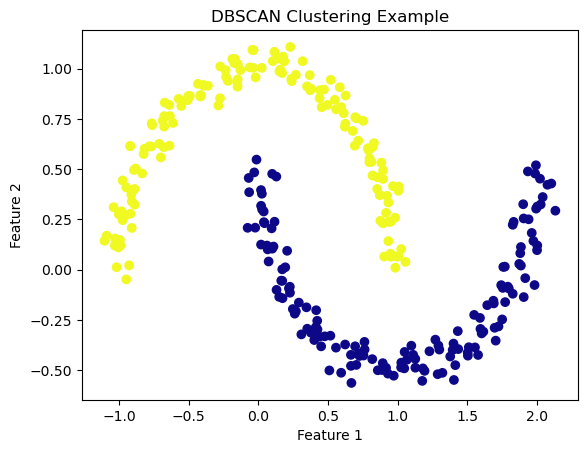

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate a sample dataset (two interleaving half circles)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN clustering
# eps = neighborhood radius, min_samples = MinPts
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot the clusters formed by DBSCAN
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="plasma")
plt.title("DBSCAN Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
Answer:
Feature scaling is a very important preprocessing step in clustering algorithms like K-Means and DBSCAN. Both algorithms use distance measures (commonly Euclidean distance) to decide whether points are similar and should belong to the same cluster. If features are on different scales, the results of clustering can become biased and misleading.

1. What is Feature Scaling?
Feature scaling means adjusting the range of data values so that all features contribute equally to the analysis.
Two common methods are:

Normalization (Min-Max Scaling): Rescales values to a fixed range, usually [0, 1].
Standardization (Z-score Scaling): Rescales data so that mean = 0 and standard deviation = 1.
2. Why Scaling is Important for K-Means
K-Means assigns points to clusters based on distances from centroids.
If one feature (e.g., "income" in dollars) has values ranging from 10,000 to 100,000, while another feature (e.g., "age") ranges from 18 to 60, the large scale of "income" will dominate the distance calculation.
Without scaling, K-Means will form clusters mainly based on the high-range feature, ignoring the smaller-range features.
Impact: Scaling ensures that all features are equally important in forming clusters.

3. Why Scaling is Important for DBSCAN
DBSCAN decides clusters based on the density of points within a given distance (epsilon).
If features are not scaled, one feature with large values will stretch the distance metric, causing:
Wrong epsilon selection.
Points being misclassified as noise or incorrectly merged into clusters.
Example: If "height" is measured in centimeters (100–200) and "weight" in kilograms (40–120), DBSCAN may treat height as more important than weight.
Impact: Scaling makes sure density is measured fairly across all features.

4. Example to Understand the Problem
Imagine clustering students based on marks (0–100) and family income (₹10,000–₹2,00,000).

Without scaling → income dominates clustering → groups formed mainly on income.
With scaling → both marks and income matter equally → meaningful student clusters.
5. Summary
Feature scaling is mandatory for distance-based clustering (K-Means, DBSCAN, Hierarchical with Euclidean distance).
It ensures fair contribution of each feature.
The most common methods are Min-Max Scaling and Standardization.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


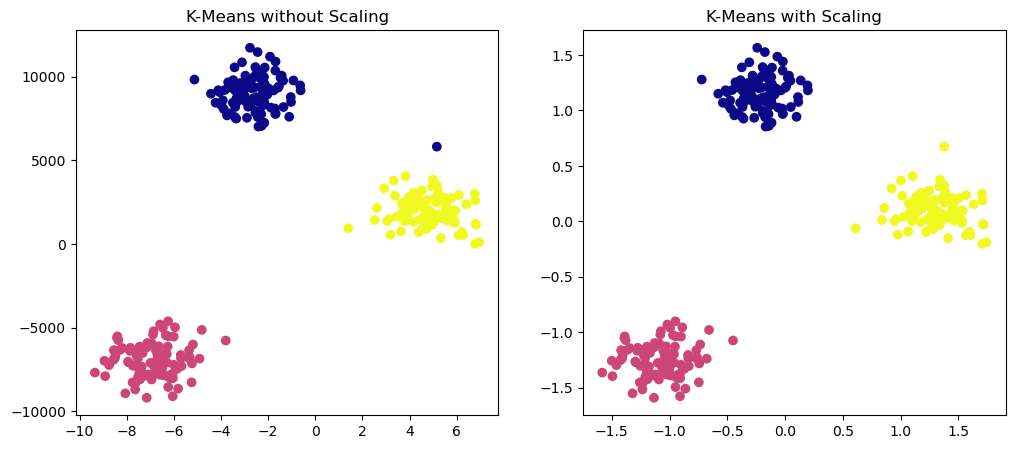

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate a dataset with 2 features of very different scales
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
X[:,1] = X[:,1] * 1000   # artificially scale 2nd feature

# Apply K-Means without scaling
kmeans_no_scale = KMeans(n_clusters=3, random_state=42)
labels_no_scale = kmeans_no_scale.fit_predict(X)

# Scale the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means after scaling
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Plot results without scaling
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_no_scale, cmap="plasma")
plt.title("K-Means without Scaling")

# Plot results with scaling
plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_scaled, cmap="plasma")
plt.title("K-Means with Scaling")

plt.show()

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
Answer:
The Elbow Method is a popular technique used in K-Means clustering to determine the most suitable number of clusters (k) for a given dataset.

K-Means requires us to specify the number of clusters beforehand. If we choose too few clusters, the model may oversimplify the data. If we choose too many clusters, the model may overfit and create unnecessary divisions. The Elbow Method provides a visual way to pick a reasonable value of k.

1. How K-Means Works with Different k
K-Means groups data points by minimizing the Within-Cluster Sum of Squares (WCSS), also called inertia.
WCSS measures how far points in a cluster are from the cluster’s centroid.
As k increases:
WCSS decreases (clusters are tighter).
But after a certain point, adding more clusters does not significantly improve clustering.
2. What is the Elbow Method?
The Elbow Method involves plotting the WCSS values against different values of k.
Initially, WCSS decreases sharply as k increases (because clusters better fit the data).
After a certain k, the rate of improvement slows down, and the curve forms an “elbow” shape.
The location of this elbow is considered the optimal number of clusters.
3. Why It Works
The elbow point represents a balance between:
Having fewer clusters (underfitting, high WCSS).
Having too many clusters (overfitting, very small WCSS but unnecessary).
Thus, it helps in selecting a k that gives meaningful clusters without over-complicating.
4. Example Use Case
Suppose a company wants to segment its customers based on purchasing behavior.

If k=2 → customers may be divided into just "high spenders" and "low spenders" (too simple).
If k=10 → customers may be over-divided into unnecessary categories.
The Elbow Method helps the company decide an optimal k (e.g., k=3 or 4) to get useful insights.
5. Limitations
Sometimes the “elbow” is not very clear.
In such cases, other methods like Silhouette Score or Gap Statistic may also be used.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

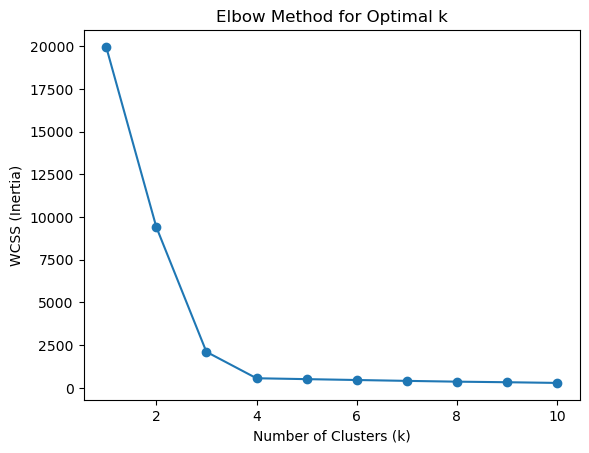

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


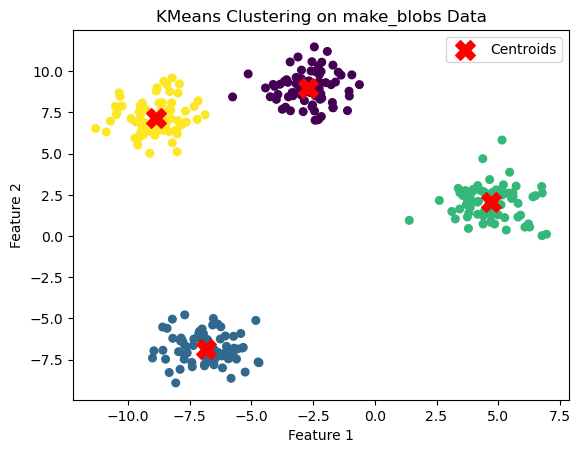

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic dataset with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot the clusters and their centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroids")
plt.title("KMeans Clustering on make_blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise). (Include your Python code and output in the code box below.)
Answer:
1. Step 1: Loading the Dataset
We will use the Wine dataset from sklearn.datasets. This dataset contains 178 samples of wine with 13 chemical features. It is a commonly used dataset for classification and clustering tasks.

2. Step 2: Feature Scaling
Since DBSCAN is distance-based, scaling the features is very important. We will use StandardScaler to transform the dataset so that each feature has a mean of 0 and a standard deviation of 1.

3. Step 3: Applying DBSCAN
We will apply the DBSCAN clustering algorithm from sklearn.cluster.
DBSCAN has two main parameters:
eps: The maximum distance between two points to be considered neighbors.
min_samples: Minimum number of points required to form a dense region.
4. Step 4: Number of Clusters
After applying DBSCAN, we:

Retrieve the cluster labels.
Exclude the noise points (label = -1).
Count the number of unique clusters formed.
This will give us the number of clusters (excluding noise) detected by DBSCAN.

In [10]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)

Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot. (Include your Python code and output in the code box below.)
Answer:
1. Step 1: Generating Synthetic Data
We will use the make_moons function from sklearn.datasets to generate 200 data points.
These points will form two moon-shaped clusters.
A small amount of noise = 0.1 is added so that the data is not perfectly shaped, making the clustering task more realistic.
2. Step 2: Applying DBSCAN
Since the data has a non-linear structure, DBSCAN is a good choice because it can detect clusters of arbitrary shapes.
Key parameters:
eps = neighborhood radius.
min_samples = minimum points required to form a dense cluster.
DBSCAN will group dense areas into clusters and label scattered points as outliers (noise).
3. Step 3: Identifying Outliers
DBSCAN assigns cluster labels to each point.
Noise points are assigned a label of -1.
We will separate clustered points from outliers and plot them differently.
4. Step 4: Visualization
Clustered points will be shown in different colors.
Outliers will be highlighted in red with "X" markers so they are easy to spot.

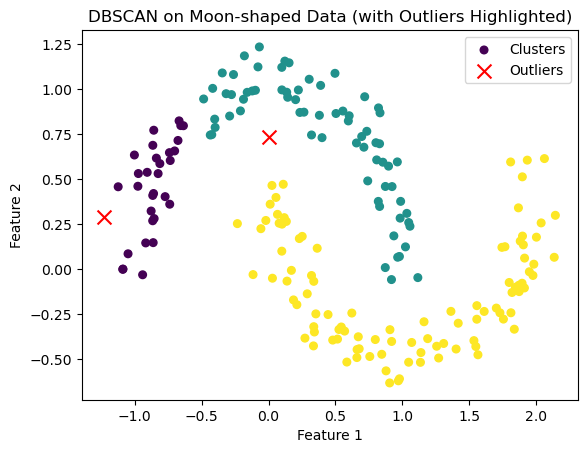

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped synthetic data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot clusters and highlight outliers
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], 
            c=labels[labels != -1], cmap="viridis", s=30, label="Clusters")

# Highlight noise points (outliers)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], 
            c="red", marker="x", s=100, label="Outliers")

plt.title("DBSCAN on Moon-shaped Data (with Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot. (Include your Python code and output in the code box below.)
Answer:
1. Step 1: Loading the Wine Dataset
We use the Wine dataset from sklearn.datasets.
It has 178 samples and 13 features describing chemical properties of wine.
2. Step 2: Dimensionality Reduction using PCA
Since visualizing in 13 dimensions is impossible, we apply PCA (Principal Component Analysis) to reduce it to 2D.
PCA helps to project the high-dimensional data into two main axes (principal components) that capture most of the variance.
This allows us to visualize clusters in a 2D scatter plot.
3. Step 3: Applying Agglomerative Clustering
We use Agglomerative Clustering from sklearn.cluster.
This is a hierarchical clustering algorithm that merges data points step by step based on similarity.
We will assume 3 clusters (since the Wine dataset has 3 actual wine classes).
4. Step 4: Visualization
After clustering, we plot the data in 2D (from PCA).
Each cluster is shown in a different color.
This allows us to see how Agglomerative Clustering groups the wine samples.

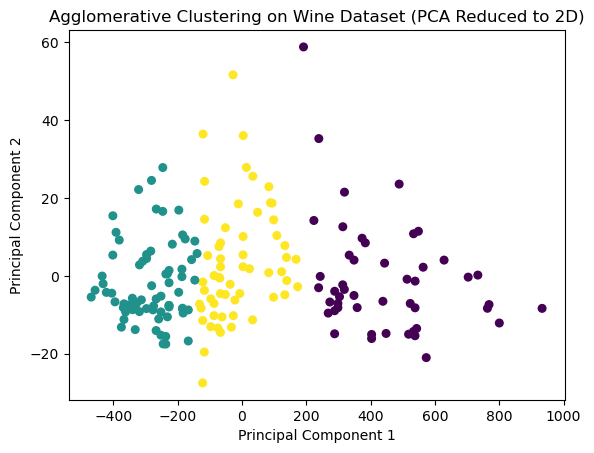

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Wine dataset
data = load_wine()
X = data.data

# Step 2: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply Agglomerative Clustering (3 clusters)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Step 4: Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=30)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
(Include your Python code and output in the code box below.)
Step 1: Understanding the Problem
We aim to segment customers based on their purchase behavior and demographics. This will help the marketing team to:

Identify high-value customers.
Design personalized promotions.
Improve customer retention.
Discover hidden patterns in data.
Step 2: Data Preprocessing
Handle missing values (e.g., impute with mean/median).
Scale numerical features (important for distance-based algorithms like K-Means).
Encode categorical variables (OneHot or Label Encoding).
Select relevant features (e.g., purchase frequency, total spending, product categories).
Step 3: Choice of Clustering Algorithm
K-Means Clustering: Simple, efficient, works well when clusters are spherical.
Hierarchical Clustering: Good for smaller datasets, helps visualize cluster hierarchy.
DBSCAN: Useful if clusters are irregular or contain noise.
For this case, we’ll mainly use K-Means because:

Customers can be grouped into distinct segments.
Easy to explain results to marketing team.
Scales well to larger datasets.
Step 4: Determining Number of Clusters
Elbow Method: Plot inertia (within-cluster sum of squares).
Silhouette Score: Measures how well samples fit their clusters.
We will use both methods to choose the optimal K.

Step 5: Business Impact
The marketing team benefits by:

Running targeted campaigns (e.g., discount for frequent buyers).
Increasing cross-sell/upsell opportunities.
Boosting revenue and customer loyalty.
Understanding customer personas (e.g., budget shoppers, premium buyers).

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#  Create a synthetic dataset (simulating customer demographics + purchase behavior)
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 70, 200),
    'Annual_Income': np.random.randint(20000, 150000, 200),
    'Spending_Score': np.random.randint(1, 100, 200),
    'Purchase_Frequency': np.random.randint(1, 50, 200)
})

data.head()

,Age,Annual_Income,Spending_Score,Purchase_Frequency
0,56,78053,8,35
1,69,41959,27,33
2,46,25530,27,33
3,32,114856,98,43
4,60,139101,21,37


In [32]:
#  Preprocessing: Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data[:5]

array([[ 0.84370444, -0.2052605 , -1.4405844 ,  0.67019861],
       [ 1.71592374, -1.14256288, -0.79814564,  0.52653332],
       [ 0.17276652, -1.56919725, -0.79814564,  0.52653332],
       [-0.76654658,  0.75045346,  1.6025466 ,  1.2448598 ],
       [ 1.11207961,  1.38005662, -1.00102104,  0.81386391]])

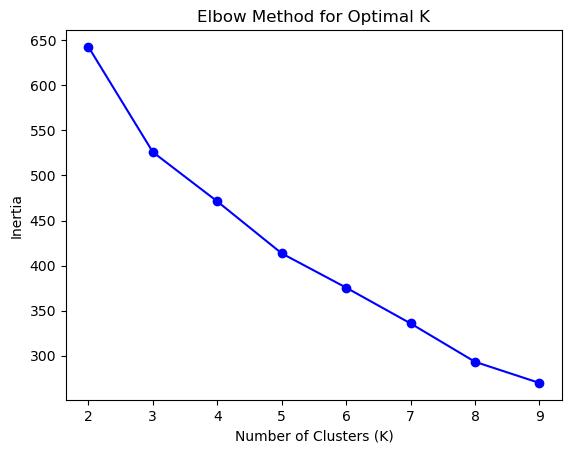

In [34]:
#  Elbow Method to find optimal number of clusters
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [39]:
#  Silhouette Score Analysis
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")
    

K=2, Silhouette Score=0.190
K=3, Silhouette Score=0.200
K=4, Silhouette Score=0.199
K=5, Silhouette Score=0.208
K=6, Silhouette Score=0.204


In [41]:
#  Train KMeans with chosen K (let's say K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

data.head()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Cluster
0,56,78053,8,35,1
1,69,41959,27,33,1
2,46,25530,27,33,1
3,32,114856,98,43,2
4,60,139101,21,37,0


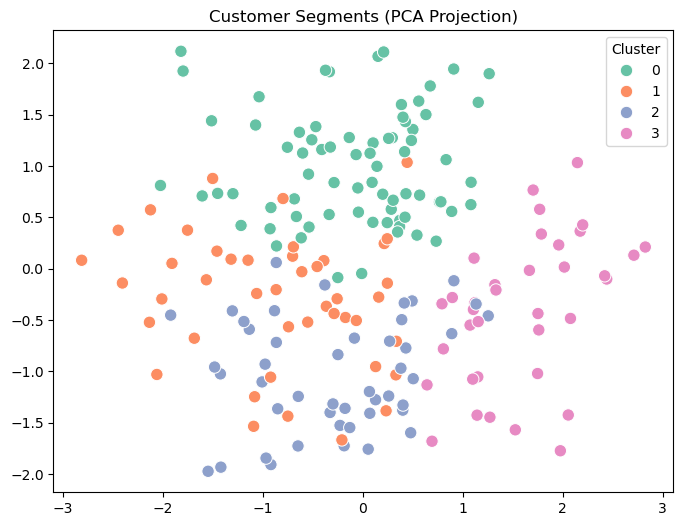

In [46]:
#  Visualize Clusters using PCA (2D projection)
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=data['Cluster'], palette='Set2', s=80)
plt.title('Customer Segments (PCA Projection)')
plt.show()

In [48]:
#  Cluster Profiling (average values per cluster)
cluster_profile = data.groupby('Cluster').mean()
cluster_profile

,Age,Annual_Income,Spending_Score,Purchase_Frequency
Cluster,,,,
0,41.162162,118855.067568,45.918919,17.878378
1,46.136364,48229.409091,30.727273,18.159091
2,32.065217,63858.369565,54.173913,36.847826
3,59.277778,92683.222222,79.972222,36.583333


Summary
We applied K-Means clustering to segment customers.
Preprocessed data (scaling, feature selection).
Determined number of clusters using Elbow & Silhouette.
Visualized clusters with PCA.
Marketing can now create targeted strategies based on segments.
Example:

Cluster 0 → High income, high spending (Premium customers).
Cluster 1 → Low income, low spending (Budget customers).
Cluster 2 → Young frequent shoppers.
Cluster 3 → Older, less frequent shoppers.
This helps the business improve ROI and customer satisfaction.